In [88]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import math

1. Смоделировать выборку из п независимых наблюдений над случайной величиной X,
имеющей нормальный закон распределения с параметрами (-2,9).

In [89]:
norm_r=sts.norm.rvs(loc=-2,scale=3, size=110)
print(norm_r)

[ -8.36153352  -2.26978594  -6.72644017  -5.51363448  -1.57698996
  -4.90447268  -4.55399722  -4.2418481  -10.69521898  -3.72712911
  -4.52416681  -2.32870974  -3.81846562  -3.17931848  -5.8785478
  -6.50791884  -4.28711112  -5.83561522  -1.02009718  -4.30315735
  -5.16304008   1.36385441   0.75410686  -0.318135    -2.67356105
   3.14744425  -2.47045483  -6.47211942  -0.95531272   0.41216011
  -2.06527224  -1.11389361  -3.43761441  -1.97431994  -0.13056632
  -0.44963459  -4.55439474  -4.0644703   -2.12388465  -5.2881418
  -0.3355592   -3.88890985  -3.01158345   0.37236652  -5.57415091
   0.17131243  -9.21293255  -4.16935728  -6.1865846   -0.54787226
  -2.54628928  -4.25726176  -1.49021121  -0.94608225   0.1288312
   1.06062262  -3.91950073  -8.60792893  -2.57319235  -2.23442016
   2.104681    -5.84262449  -4.38785992  -4.03344534  -0.93039622
  -3.42241188  -5.99659432  -1.31385452  -4.19105492  -1.62719346
   1.82305957  -1.76368538  -1.74568315  -6.95449721  -3.44962756
  -0.03535395

1.1. Сгруппировать данные в интервалы и найти интервальный ряд абсолютных
частот. Число интервалов группировки выбрать в соответствии с правилом,
указанном в Вашем варианте. Вычислить средствами Python сумму
абсолютных частот. Построить диаграмму абсолютных частот.

In [90]:
average = sum(norm_r) / len(norm_r) #среднее значение


In [91]:
sum_squared=0 #числитель для формулы Скотта
for i in norm_r:
    sum_squared+=(i-average)**2

In [92]:
s=math.sqrt(sum_squared/(110-1))
print(s)

3.014620662568095


In [93]:
std=np.std(norm_r) #проверка через функцию std
print(std)

3.0008865562316327


In [94]:
h=3.5*s*(110**(-1/3)) #ширина интервала по формуле Скотта
print(h)

2.2020972141348447


In [95]:
bin_edges = np.arange(min(norm_r), max(norm_r) + h, h) #границы интервалов
print(bin_edges)

[-10.69521898  -8.49312177  -6.29102455  -4.08892734  -1.88683012
   0.31526709   2.51736431   4.71946152]


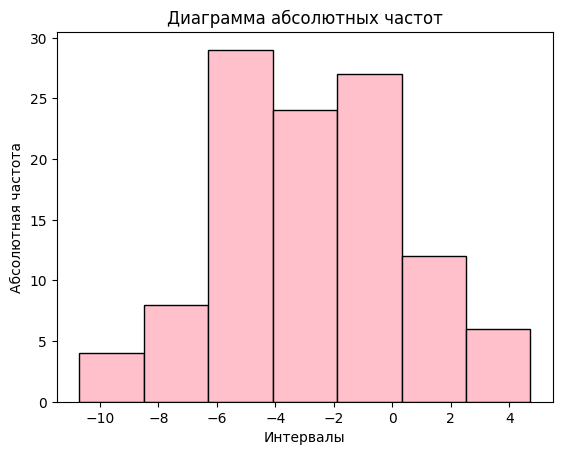

In [96]:
freqs, edges, _ =plt.hist(norm_r, bins=bin_edges,  color='pink', edgecolor='black')
plt.title('Диаграмма абсолютных частот')
plt.xlabel('Интервалы')
plt.ylabel('Абсолютная частота')
plt.show()

In [97]:
print(freqs) #кол-во наблюдений в каждом интервале (частоты)
print(freqs.sum()) #сумма абсолютных частот

[ 4.  8. 29. 24. 27. 12.  6.]
110.0


1.2. Сгруппировать данные в интервалы и найти интервальный ряд относительных
частот. Вычислить средствами Python сумму относительных частот. Построить
диаграмму относительных частот.

In [98]:
relative_freqs = freqs / 110
print(relative_freqs)
print(relative_freqs.sum())

[0.03636364 0.07272727 0.26363636 0.21818182 0.24545455 0.10909091
 0.05454545]
1.0


In [99]:
bin_edges_rel = (np.arange(min(norm_r), max(norm_r) + h, h))/110
print(bin_edges_rel)

[-0.09722926 -0.0772102  -0.05719113 -0.03717207 -0.017153    0.00286606
  0.02288513  0.0429042 ]


Text(0, 0.5, 'Плотность')

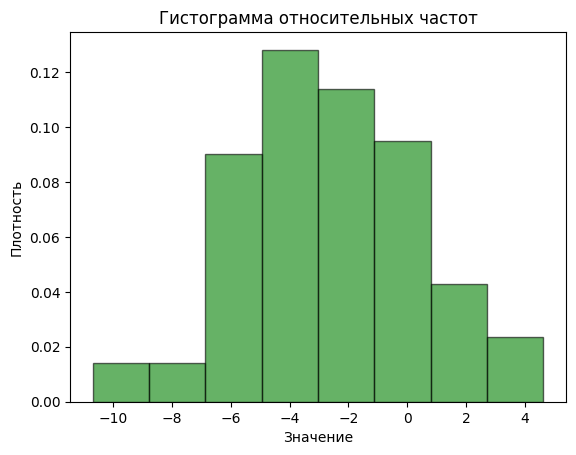

In [100]:
plt.hist(norm_r, bins=len(bin_edges_rel), density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение')
plt.ylabel('Плотность')

2.1. Построить гистограмму относительных частот и теоретическую кривую
распределения случайной величины X (причем гистограмму и кривую
распределения разместить на одном рисунке).

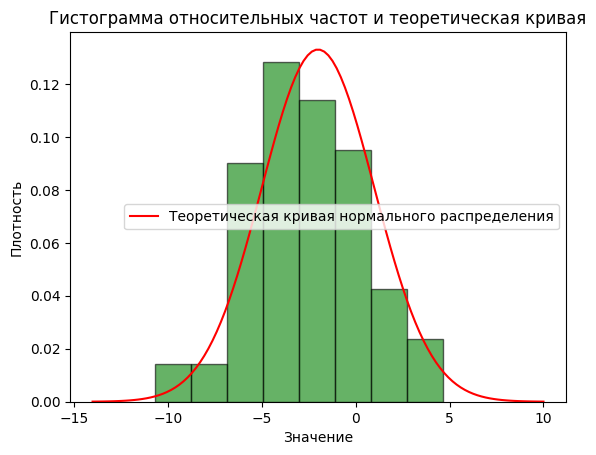

In [101]:
mu=-2
sigma=3
plt.hist(norm_r, bins=len(bin_edges_rel), density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение')
plt.ylabel('Плотность')
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 110)  # диапазон x для кривой
pdf = sts.norm.pdf(x, mu, sigma)  # плотность вероятности
plt.plot(x, pdf, 'r-', label='Теоретическая кривая нормального распределения')

# Настройка графика
plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()

2.2. Построить гистограмму абсолютных и график теоретической частоты
распределения случайной величины X (причем и гистограмму, и график
теоретической частоты разместить на одном рисунке).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


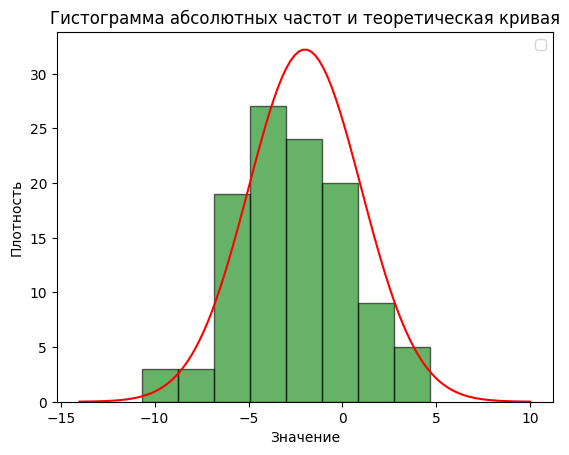

In [102]:
mu=-2
sigma=3
plt.hist(norm_r, bins=len(bin_edges_rel), alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма абсолютных частот')
plt.xlabel('Значение')
plt.ylabel('Плотность')
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 110)  # диапазон x для кривой
pdf = (sts.norm.pdf(x, mu, sigma))*110*h # плотность вероятностии маштабирование кривой
plt.plot(x, pdf, 'r-')

# Настройка графика
plt.title('Гистограмма абсолютных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()

2.3 Построить по выборке график эмпирической функции распределения
случайной величины X (кумуляту относительных частот) и график
теоретической функции распределения случайной величины X, разместив их
на одном рисунке.

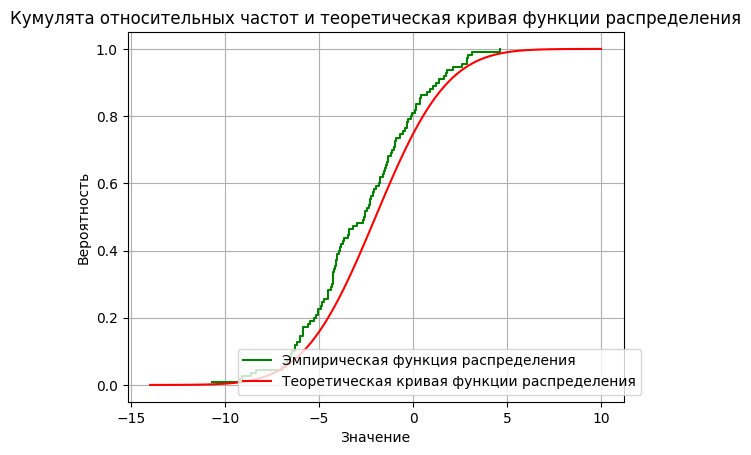

In [103]:
# Построение кумуляты относительных частот (эмпирическая функция распределения)
sorted_data = np.sort(norm_r)
cumulative_counts = np.arange(1, 110 + 1) / 110

# Построение графика
plt.step(sorted_data, cumulative_counts, label='Эмпирическая функция распределения', color='g', where='post')

# Построение теоретической кривой функции распределения
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 110)  # диапазон x для кривой
cdf = sts.norm.cdf(x, mu, sigma)  # теоретическая функция распределения 
plt.plot(x, cdf, 'r-', label='Теоретическая кривая функции распределения')

# Настройка графика
plt.title('Кумулята относительных частот и теоретическая кривая функции распределения')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0))  # Поместить легенду справа и ниже графика

# Показать график
plt.grid()
plt.show()

2.4 Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему
статистическую интерпретацию. В частности, ответить на вопрос: Каково
теоретически ожидаемое число выбросов для выборки данного объема?

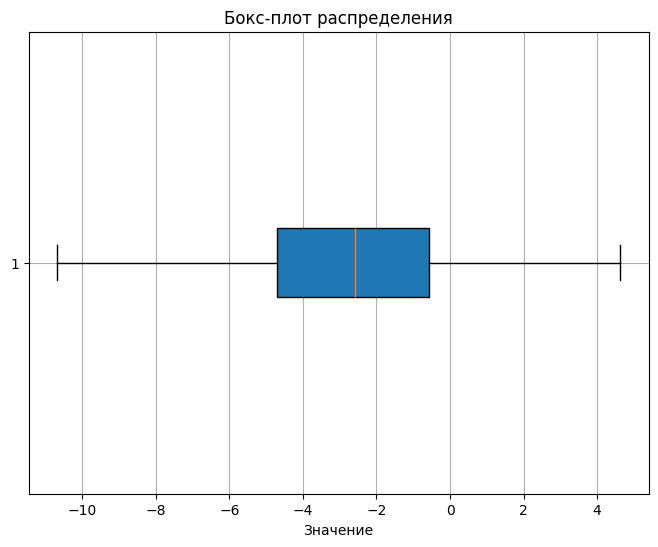

Фактическое количество выбросов: 0
Теоретическое ожидаемое количество выбросов: 3


In [104]:
# Построение бокс-плота
plt.figure(figsize=(8, 6))
plt.boxplot(norm_r, vert=False, patch_artist=True)
plt.title('Бокс-плот распределения')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

# Рассчитываем основные статистики
q1 = np.percentile(norm_r, 25)
q3 = np.percentile(norm_r, 75)
iqr = q3 - q1

# Вычисляем усам и выбросам
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Находим выбросы
outliers=[]
for i in norm_r:
    if (i<lower_bound )| (i> upper_bound):
        outliers.append(i)
num_outliers = len(outliers)

# Теоретическое количество выбросов для нормального распределения
# Приблизительно 1.5% данных находятся за пределами ±3 ско
theoretical_outliers = 0.03 * 110

print(f"Фактическое количество выбросов: {num_outliers}")
print(f"Теоретическое ожидаемое количество выбросов: {theoretical_outliers:.0f}")

3. Используя таблицу значений функции Лапласа, найти вероятность
(вычисления вероятности сделать “вручную” )

P(|X - MX| < qσ)

MX=-2
σ=3
q=1.25
Ф(1.25)=0,7887

In [105]:
#a=-2 заданы, но посчитаю вручную
q=1.25
#sigma=3
a=sum(norm_r)/len(norm_r)
print(a)
sigma = math.sqrt(sum((x - a) ** 2 for x in norm_r) / len(norm_r))
print(sigma)
x_lower = a - q * sigma
x_upper = a + q * sigma
print(f'Границы интервала: [{x_lower:.4f}, {x_upper:.4f}]')

# Рассчитаем вручную нормализованные границы (Z-значения)
z_lower = (x_lower - a) / sigma
z_upper = (x_upper - a) / sigma

# Используем таблицу стандартного нормального распределения для нахождения cdf
# или воспользуемся готовой функцией для стандартного нормального распределения
P_lower = sts.norm.cdf(z_lower)  # cdf для нижней границы
P_upper = sts.norm.cdf(z_upper)  # cdf для верхней границы
print(f'Границы интервала: [{z_lower:.4f}, {z_upper:.4f}]')
print(P_lower)
print(P_upper)
# Вычисляем вероятность, что случайная величина попадет в интервал
P = P_upper - P_lower

# Выводим вероятность
print(f'Вероятность P({x_lower:.4f} ≤ X ≤ {x_upper:.4f}) = {P:.8f}')


-2.722570831261555
3.000886556231633
Границы интервала: [-6.4737, 1.0285]
Границы интервала: [-1.2500, 1.2500]
0.10564977366685535
0.8943502263331446
Вероятность P(-6.4737 ≤ X ≤ 1.0285) = 0.78870045


In [106]:
a=np.mean(norm_r)
sigma = np.std(norm_r)
print(a)
print(sigma)
lower_bound = a - q * sigma
upper_bound = a + q * sigma

# Найдем долю элементов в выборке, попадающих в этот диапазон
P = 2*sts.norm.cdf(q) - 1

# 5. Вывод результата
print(f'Вероятность P(|X - MX| < {q}σ) = {P:.8f}')

-2.7225708312615535
3.0008865562316327
Вероятность P(|X - MX| < 1.25σ) = 0.78870045


3.2. Найдите по выборке оценку вероятности (*), т.е. относительную частоту события

{|X - MX| < qσ}.

In [107]:
# Вычисляем количество значений, которые находятся в диапазоне (MX - q*sigma, MX + q*sigma)
quantity=[]
lower_bound =  a- q * sigma
upper_bound = a + q * sigma
for i in norm_r:
    if (i>lower_bound )& (i< upper_bound):
        quantity.append(i)
P=len(quantity)/110
print(f'Относительная частота(|X - MX| < {q}σ) = {P:.4f}')

Относительная частота(|X - MX| < 1.25σ) = 0.7909


3.3. Увеличьте объем выборки п в 50 раз и повторите п. 2.2. Объясните, как увеличение объема выборки повлияло на точность оценки вероятности (*).

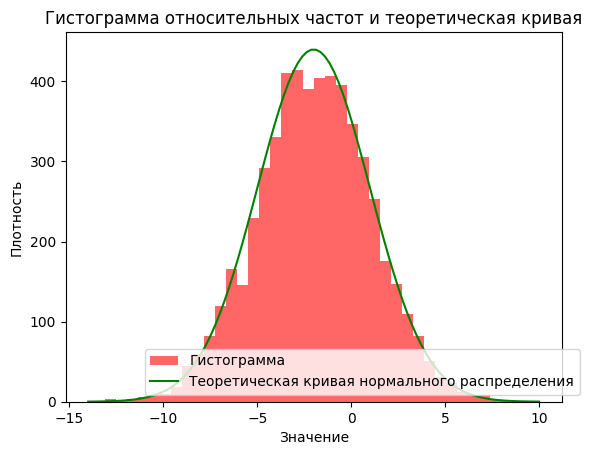

In [108]:
normal=sts.norm.rvs(loc=-2,scale=3, size=110*50)
s=np.std(normal)
h=3.5*s*((110*50)**(-1/3)) #ширина интервала по формуле Скотта
bin_edges = np.arange(min(normal), max(normal) + h, h) #границы интервалов
# Гистограмма частот
plt.hist(normal, bins=len(bin_edges), density=False, alpha=0.6, color='r', label='Гистограмма')
# Построение теоретической кривой нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)  # диапазон x для кривой
pdf = (sts.norm.pdf(x, mu, sigma))*110*50*h  # плотность вероятности
plt.plot(x, pdf, 'g-', label='Теоретическая кривая нормального распределения')

# Настройка графика
plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0)) 

# Показать график
plt.show()


In [109]:
a=np.mean(normal)
sigma = np.std(normal)
print(a)
print(sigma)
lower_bound = a - q * sigma
upper_bound = a + q * sigma

# Найдем долю элементов в выборке, попадающих в этот диапазон
P = 2*sts.norm.cdf(q) - 1

# 5. Вывод результата
print(f'Вероятность P(|X - MX| < {q}σ) = {P:.8f}')

-1.9855266248483918
3.034276467911845
Вероятность P(|X - MX| < 1.25σ) = 0.78870045


4.Вычислить по выборке точечные оценки параметров распределения случайной величины
X: математического ожидания, медианы, дисперсии, стандартного отклонения,
коэффициента ассиметрии, эксцесса двумя способами:
4.1. первый способ –непосредственное применение формул для вычисления
точечных оценок;

In [110]:
# Вычисление основных числовых характеристик
mean = sum(norm_r)/len(norm_r)       # Математическое ожидание

sorted=np.sort(norm_r)
median = (sorted[54]+sorted[55])/2   # Медиана

sum_squared=0 #числитель
for i in norm_r:
    sum_squared+=(i-average)**2
s=(sum_squared/(110))# Дисперсия

std_dev = np.sqrt(s)                 # Стандартное отклонение

sum_q=0
for i in norm_r:
    sum_q+=((i-mean)/std_dev)**3
skewness = (1/110)*sum_q             # Коэффициент ассиметрии


sum_1=0
for j in norm_r:
    sum_1+=((j-mean)/std_dev)**4
kurtosis = ((1/110)*sum_1)-3  # Эксцесс

# Вывод результатов
print(f'Математическое ожидание: {mean:.5f}')
print(f'Медиана: {median:.5f}')
print(f'Дисперсия: {s:.3f}')
print(f'Стандартное отклонение: {std_dev:.5f}')
print(f'Коэффициент ассиметрии: {skewness:.5f}')
print(f'Эксцесс: {kurtosis:.5f}')

Математическое ожидание: -2.72257
Медиана: -2.59396
Дисперсия: 9.005
Стандартное отклонение: 3.00089
Коэффициент ассиметрии: -0.01253
Эксцесс: -0.30112


второй способ – применение встроенных функций Python, например, describe,
std, mean и т.д.

In [111]:
# Вычисление основных числовых характеристик
mean = np.mean(norm_r)               # Математическое ожидание
median = np.median(norm_r)           # Медиана
variance = np.var(norm_r)            # Дисперсия
std_dev = np.std(norm_r)             # Стандартное отклонение
skewness = sts.skew(norm_r)        # Коэффициент ассиметрии
kurtosis = sts.kurtosis(norm_r)    # Эксцесс

# Вывод результатов
print(f'Математическое ожидание: {mean:.5f}')
print(f'Медиана: {median:.5f}')
print(f'Дисперсия: {variance:.3f}')
print(f'Стандартное отклонение: {std_dev:.5f}')
print(f'Коэффициент ассиметрии: {skewness:.5f}')
print(f'Эксцесс: {kurtosis:.5f}')

Математическое ожидание: -2.72257
Медиана: -2.59396
Дисперсия: 9.005
Стандартное отклонение: 3.00089
Коэффициент ассиметрии: -0.01253
Эксцесс: -0.30112


4.3. Увеличьте объем выборки п в 50 раз и повторите п. 4. 2.

In [112]:
# Вычисление основных числовых характеристик
mean = np.mean(normal)               # Математическое ожидание
median = np.median(normal)           # Медиана
variance = np.var(normal)            # Дисперсия
std_dev = np.std(normal)             # Стандартное отклонение
skewness = sts.skew(normal)        # Коэффициент ассиметрии
kurtosis = sts.kurtosis(normal)    # Эксцесс

# Вывод результатов
print(f'Математическое ожидание: {mean:.5f}')
print(f'Медиана: {median:.5f}')
print(f'Дисперсия: {variance:.3f}')
print(f'Стандартное отклонение: {std_dev:.5f}')
print(f'Коэффициент ассиметрии: {skewness:.5f}')
print(f'Эксцесс: {kurtosis:.5f}')

Математическое ожидание: -1.98553
Медиана: -1.96178
Дисперсия: 9.207
Стандартное отклонение: 3.03428
Коэффициент ассиметрии: -0.03587
Эксцесс: 0.02363


### Часть II.
1.Смоделировать выборку из п независимых наблюдений над случайной величиной Y,
имеющей закон распределения, указаный в Вашем варианте.

In [113]:
student_t = sts.t.rvs(df=7, size=110)

2. Для визуализации данных построить гистограмму относительных частот и
теоретическую кривую распределения случайной величины Y (причем гистограмму и
кривую распределения разместить на одном рисунке).

In [114]:
std_dev = np.std(student_t)

# Формула Скотта: ширина бина
h_t = 3.5 * std_dev / (110 ** (1/3))

#полученные интервалы
bins = (np.arange(min(student_t), max(student_t) + h_t, h_t))/110
print(bins)


[-0.03265057 -0.02443076 -0.01621094 -0.00799112  0.00022869  0.00844851
  0.01666833  0.02488814  0.03310796]


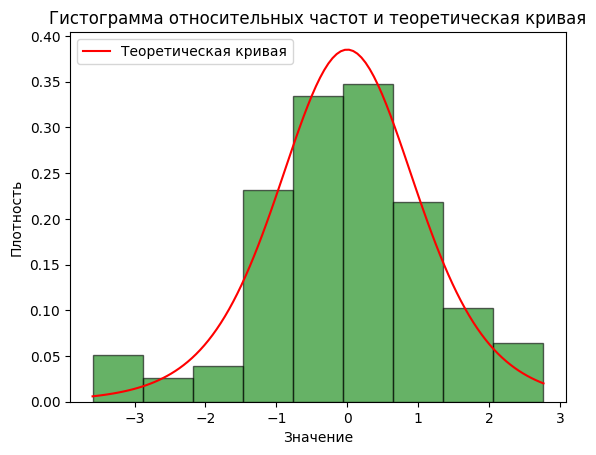

In [115]:
plt.hist(student_t, bins=len(bins), density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение')
plt.ylabel('Плотность')

# Теоретическая кривая распределения Стьюдента
x = np.linspace(np.min(student_t), np.max(student_t), 110)
pdf = sts.t.pdf(x, 7)
plt.plot(x, pdf, 'r', label="Теоретическая кривая")

# Настройка графика
plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()

3.Построить по выборке бокс-плот распределения (“ящик с усами”) случайной величины Y
и дать ему статистическую интерпретацию.

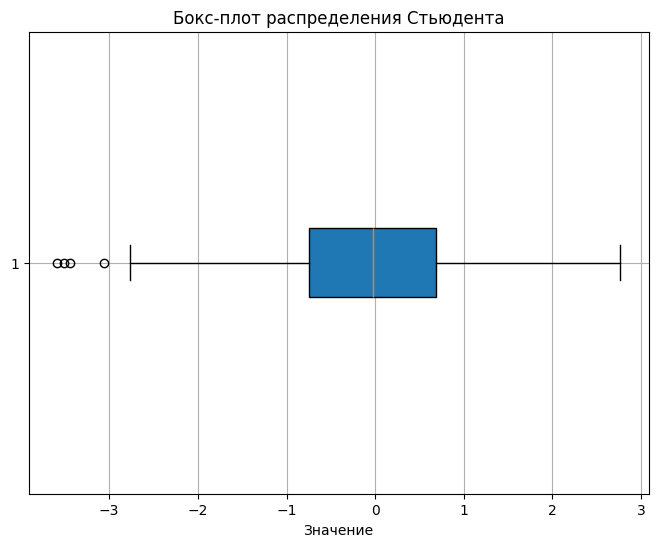

Фактическое количество выбросов: 4
Теоретическое ожидаемое количество выбросов: 3


In [116]:
# Построение бокс-плота
plt.figure(figsize=(8, 6))
plt.boxplot(student_t, vert=False, patch_artist=True)
plt.title('Бокс-плот распределения Стьюдента')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

# Рассчитываем основные статистики для распределения Стьюдента
q1 = np.percentile(student_t, 25)
q3 = np.percentile(student_t, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Находим выбросы для выборки распределения Стьюдента
outliers = []
for i in student_t:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)

# Вычисляем теоретическое количество выбросов для распределения Стьюдента
# Определяем вероятность того, что значение окажется за пределами границ
p_lower = sts.t.cdf(lower_bound, 7)
p_upper = 1 - sts.t.cdf(upper_bound, 7)

# Общая теоретическая вероятность выбросов
p_outliers = p_lower + p_upper

# Теоретическое количество выбросов
theoretical_outliers = p_outliers * 110

print(f"Фактическое количество выбросов: {num_outliers}")
print(f"Теоретическое ожидаемое количество выбросов: {theoretical_outliers:.0f}")

Используя теоретические знания о функции распределения случайной величины, найти
вероятность (вычисления вероятности сделать “вручную” )

P(|Y -M Y | < qσ)

In [117]:
#MX=0, т.к. k>1
#DX=n/n-2
#q=1.25 по условию
MX=0
sigma=np.sqrt(7/5)
b=sigma*1.25 #1.47902
#P(∣Y−0∣ < qσ)=P(−qσ<Y<qσ)=P(−b<Y<b)=Ф(b)+Ф(b)=2Ф(b)-1
P=2*0.8611-1
print(f"Решение вручную: {P:.4f}")



Решение вручную: 0.7222


2.1. Найти вероятность, используя встроенные функции Python.

In [118]:
# Используем функцию CDF для нахождения вероятности
cdf_sigma = sts.t.cdf(sigma, 7)
theoretical_p = 2 * cdf_sigma - 1  # P(-sigma < Y < sigma)
print(f"Решение с использованием встроенных функций: {theoretical_p:.4f}")

Решение с использованием встроенных функций: 0.7247


2.2. Найдите по выборке оценку вероятности (*), т.е. относительную частоту события

{ |Y -M Y |< qσ}={|Y-0|< b}={-b< Y < b}.

In [119]:
quan_y=[]
for i in student_t:
    if (i>-b )& (i<b):
        quan_y.append(i)
P_1=len(quan_y)/110
print(f'Относительная частота(|X - MX| < {q}σ) = {P_1:.6f}')

Относительная частота(|X - MX| < 1.25σ) = 0.809091


2.3. Увеличьте объем выборки п в 50 раз и повторите п. 2.2. Объясните, как увеличение
объема выборки повлияло на точность оценки вероятности (*).

In [120]:
t_big = sts.t.rvs(df=7, size=110*50) #b=q*sigma останется таким же

In [121]:
quan_big=[]
for i in t_big:
    if (i>-b )& (i<b):
        quan_big.append(i)
P_big=len(quan_big)/(110*50)
print(f'Относительная частота(|X - MX| < {q}σ) = {P_big:.6f}')

Относительная частота(|X - MX| < 1.25σ) = 0.817273


3. Вычислить по выборке точечные оценки параметров распределения случайной величины
X: математического ожидания, медианы, дисперсии, стандартного отклонения,
коэффициента ассиметрии, эксцесса, применяя встроенных функций Python, например,
describe, std, mean и т.д.
Чему равны коэффициенты ассиметрии и эксцесса распределения случайной величины Y?

In [124]:
#Вычисление точечных оценок

mean_value = np.mean(student_t)  # Математическое ожидание
median_value = np.median(student_t)  # Медиана
variance_value = np.var(student_t)  # Дисперсия 
std_dev_value = np.std(student_t)  # СКО

# Коэффициенты асимметрии и эксцесса
skewness = sts.skew(student_t)  # Коэффициент асимметрии
kurtosis = sts.kurtosis(student_t)  # Эксцесс 

# 3. Вывод результатов
print(f"Математическое ожидание: {mean_value:.4f}")
print(f"Медиана: {median_value:.4f}")
print(f"Дисперсия: {variance_value:.4f}")
print(f"Стандартное отклонение: {std_dev_value:.4f}")
print(f"Коэффициент асимметрии: {skewness:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")

Математическое ожидание: -0.0207
Медиана: -0.0224
Дисперсия: 1.5322
Стандартное отклонение: 1.2378
Коэффициент асимметрии: -0.4028
Эксцесс: 0.7661


Посчитаем точечные характеристики для выборки в 50 раз больше

In [125]:
#Вычисление точечных оценок

mean_value = np.mean(t_big)  # Математическое ожидание
median_value = np.median(t_big)  # Медиана
variance_value = np.var(t_big)  # Дисперсия 
std_dev_value = np.std(t_big)  # СКО

# Коэффициенты асимметрии и эксцесса
skewness = sts.skew(t_big)  # Коэффициент асимметрии
kurtosis = sts.kurtosis(t_big)  # Эксцесс 

# 3. Вывод результатов
print(f"Математическое ожидание: {mean_value:.4f}")
print(f"Медиана: {median_value:.4f}")
print(f"Дисперсия: {variance_value:.4f}")
print(f"Стандартное отклонение: {std_dev_value:.4f}")
print(f"Коэффициент асимметрии: {skewness:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")

Математическое ожидание: -0.0029
Медиана: 0.0221
Дисперсия: 1.3766
Стандартное отклонение: 1.1733
Коэффициент асимметрии: -0.0903
Эксцесс: 1.4544
